# PACKAGES AND LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, ConfusionMatrixDisplay, confusion_matrix 

# DATA

In [2]:
nba_log = pd.read_csv('nba_logreg.csv')

INFORMATION ABOUT THE DATA

In [3]:
nba_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

In [4]:
nba_log.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [5]:
nba_log.tail()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0
1339,Jon Barry,47,11.7,4.4,1.6,4.4,36.9,0.4,1.3,33.3,...,1.0,67.3,0.2,0.7,0.9,1.4,0.7,0.1,0.9,1.0


# DATA EXPLORATION FOR THE NUMERIC VARIABLES

This is the analysis of the numerical variables - SUMMARY STATISTICS 

In [6]:
nba_log.describe().T

,count,mean,std,min,25%,50%,75%,max
GP,1340.0,60.414179,17.433992,11.0,47.000,63.00,77.0,82.0
MIN,1340.0,17.624627,8.307964,3.1,10.875,16.10,22.9,40.9
PTS,1340.0,6.801493,4.357545,0.7,3.700,5.55,8.8,28.2
FGM,1340.0,2.629104,1.683555,0.3,1.400,2.10,3.4,10.2
FGA,1340.0,5.885299,3.593488,0.8,3.300,4.80,7.5,19.8
FG%,1340.0,44.169403,6.137679,23.8,40.200,44.10,47.9,73.7
3P Made,1340.0,0.247612,0.383688,0.0,0.000,0.10,0.4,2.3
3PA,1340.0,0.779179,1.061847,0.0,0.000,0.30,1.2,6.5
3P%,1329.0,19.308126,16.022916,0.0,0.000,22.40,32.5,100.0
FTM,1340.0,1.297687,0.987246,0.0,0.600,1.00,1.6,7.7


Count the total number of the missing observation for each variables

In [7]:
nba_log.isnull().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

3P% column has 11 missing observations

# DROP COLUMN

I wish to drop the name variable as it is not important for the analysis

In [8]:
nba_log.drop('Name', axis=1, inplace=True)
nba_log.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


# REPLACE

Also, I wish to replace the TARGET_5Yrs column, so 0 represent '< 5 yrs', and 1 represent '>= 5 yrs'

In [9]:
nba_log.TARGET_5Yrs.replace({
    0: '< 5 yrs',
    1: '>= 5 yrs'
}, inplace=True)

In [10]:
nba_log.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,< 5 yrs
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,< 5 yrs
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,< 5 yrs
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,>= 5 yrs
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,>= 5 yrs


# DISTRIBUTION OF THE NUMERIC VARIABLES 

<AxesSubplot:ylabel='Frequency'>

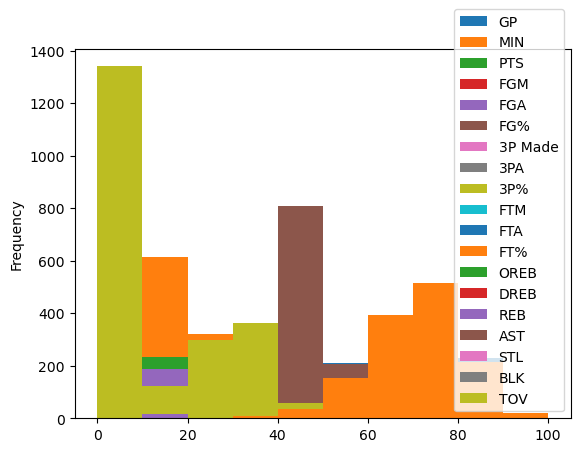

In [11]:
nba_log.plot(kind='hist')

The above does not give much information about the numeric data.
Plotting each numerical variable separately to view the data for each is a preferable approach.
Therefore, I created a Python list for each numerical variable.

In [12]:
numeric_variables = [
    'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM', 
    'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV'
]

<AxesSubplot:xlabel='GP', ylabel='Count'>

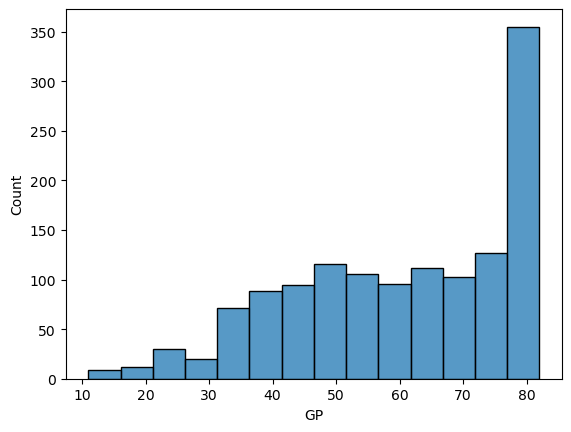

In [13]:
sns.histplot(nba_log['GP'])

By inserting subplot, I'll simultaneously plot each numerical variable using a histplot side-by-side;

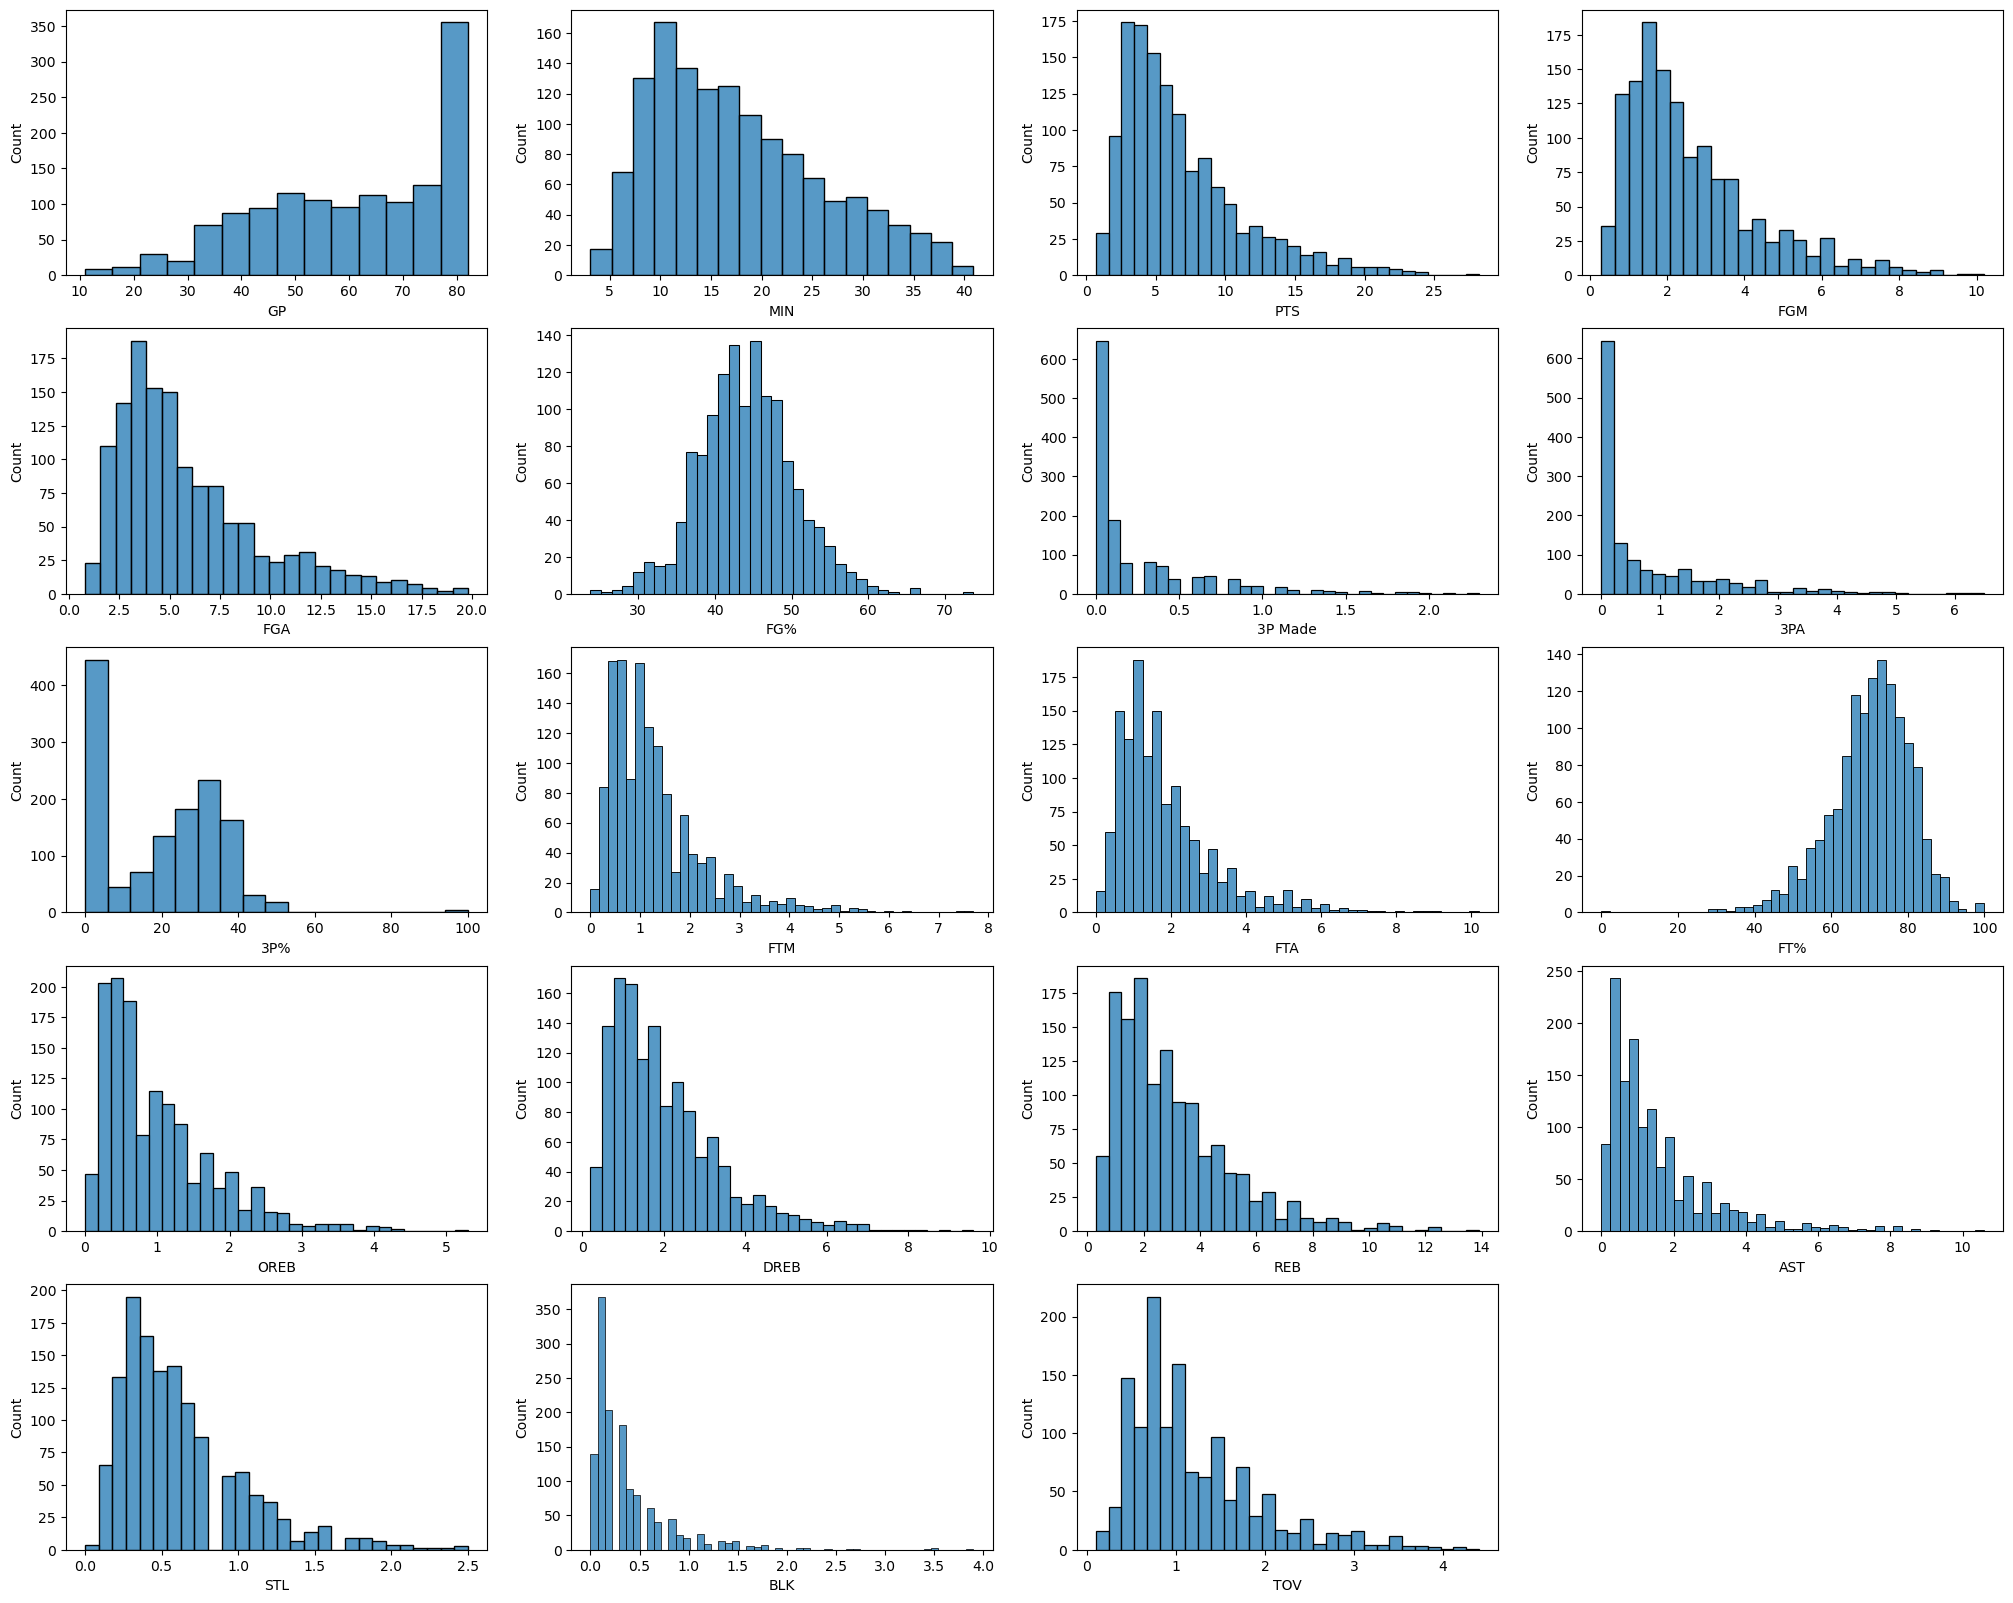

In [14]:
plt.figure(figsize=(25,20))
for plot in range(len(numeric_variables)):
    plt.subplot(5, 4, plot+1)
    sns.histplot(nba_log[numeric_variables[plot]])
plt.show()

From the above, there are some outliers in 3P%, FT%, BLK and also the scales are not balanced. For example the 3P% has a scale of between 0-100, FTM has a scale of between 0-8, FTA has a scale of between 0-10 etc)

Additionally, I want to utilise a boxplot to display the numerical variables. The box plot effectively displays the five-number summary and outliers.

The five number summary are, Minimum vaalue, 25th percentile, 50th percentile, 75% percentile and maximum value

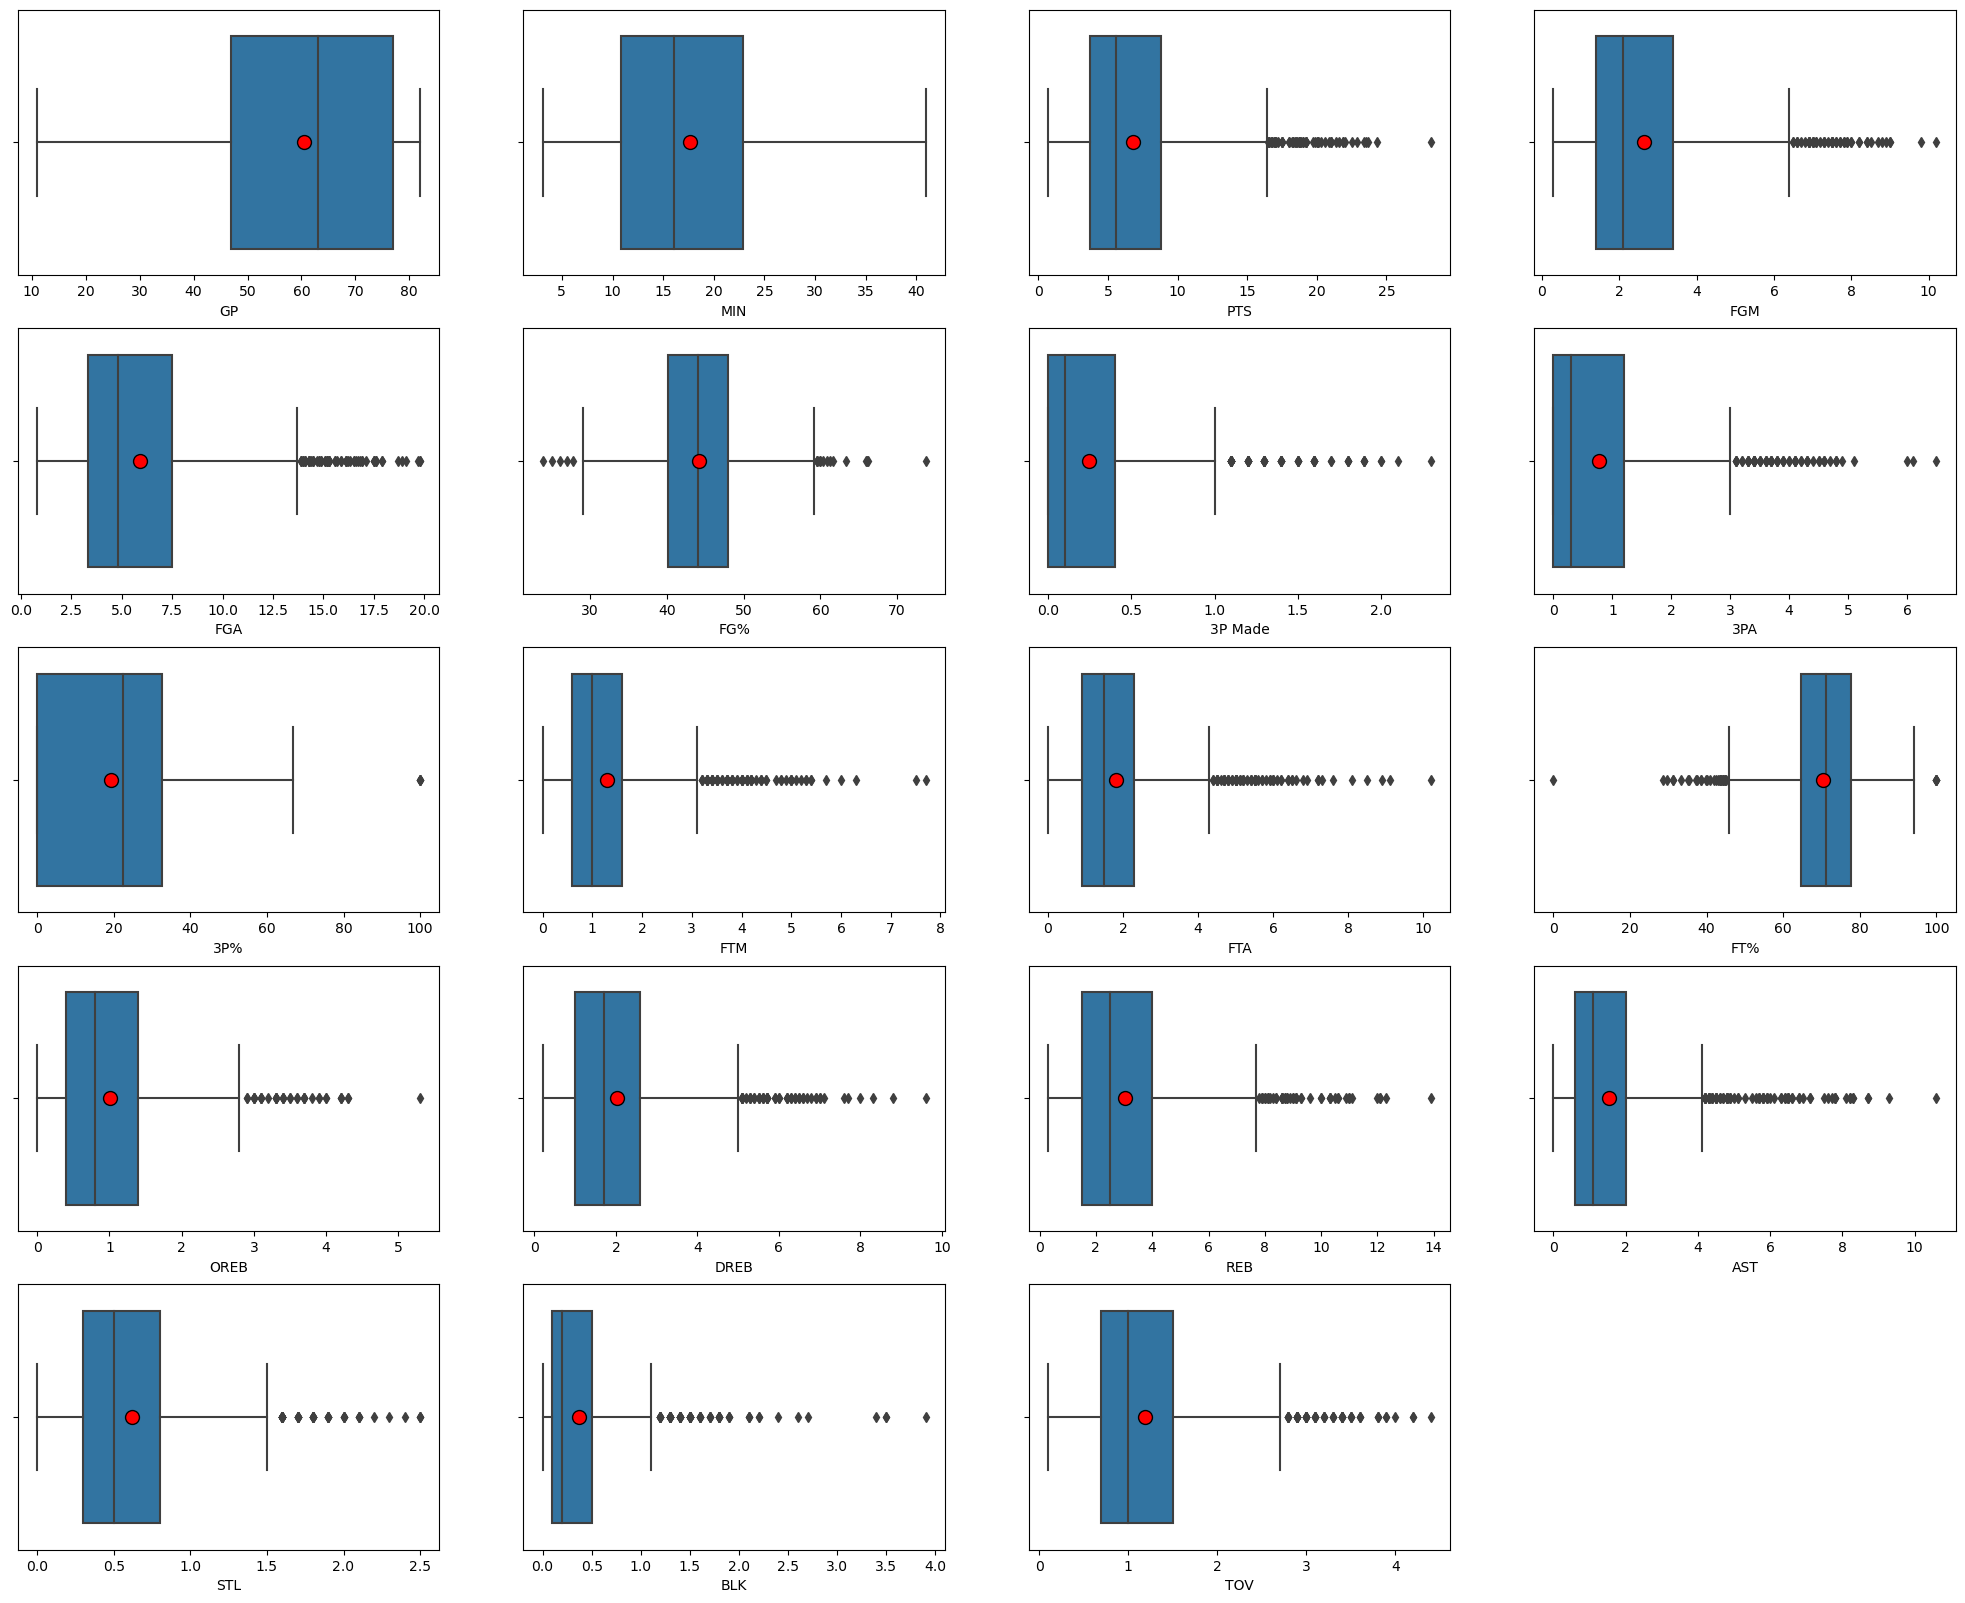

In [15]:
plt.figure(figsize=(25,20))
for plot in range(len(numeric_variables)):
    plt.subplot(5, 4, plot+1)
    sns.boxplot(x = nba_log[numeric_variables[plot]], showmeans = True, meanprops = {'marker': 'o',
                                                                                        'markerfacecolor': 'red',
                                                                                        'markeredgecolor': 'black',
                                                                                        'markersize': '10'})
plt.show()

From the plot above, it is clear that all the variables are not on the same scale. The standardscaler() will be used to scale

# DATA EXPLORATION FOR THE NON-NUMERIC VARIABLE

My focus is on the y variable - Target_5yrs variable which will be examined.
In this situation, I'm trying to foretell whether a person will be classified as having a career length >= 5 years or <= 5years

In [16]:
nba_log['TARGET_5Yrs'].value_counts()

>= 5 yrs    831
< 5 yrs     509
Name: TARGET_5Yrs, dtype: int64

Verifying the aforementioned with percentage

In [17]:
nba_log['TARGET_5Yrs'].value_counts(normalize=True)

>= 5 yrs    0.620149
< 5 yrs     0.379851
Name: TARGET_5Yrs, dtype: float64

Pie-chart representation of the aforementioned

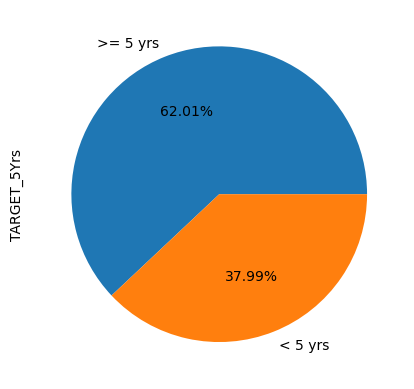

In [18]:
nba_log.TARGET_5Yrs.value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.show()

Count-plot representation of the aforementioned

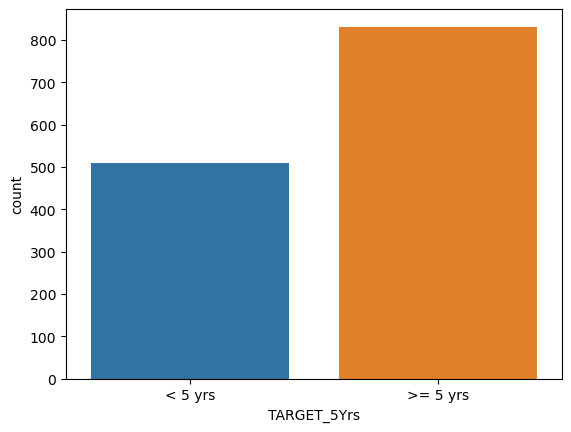

In [19]:
sns.countplot(x=nba_log.TARGET_5Yrs)
plt.show()

# FEATURE ENGINEERING/SELECTION


Depending on what kind of data scientist one is, it can imply different things to different people.For text data scientist, part of the featuring engineering for a text data scientist could be extracting data from text.
Feature engineering may entail information extraction from photographs for a data scientist who works with images.
Data collecting and data modelling are separated by feature engineering. Making the data set compatible with the task.

Some of the feature engineering methods that will be used are value normalization and imput missing observation for the numeric variable and One Hot Encoding for the categorical variable.

IMPUTE MISSING OBSERVATIONS AND SAVE IT 

In [20]:
imputer=SimpleImputer(strategy='median')

In [21]:
numImputer = SimpleImputer(missing_values=np.nan, strategy='median')
numImputer = numImputer.fit(nba_log[['3P%']])
nba_log[['3P%']]=numImputer.transform(nba_log[['3P%']])
nba_log

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,< 5 yrs
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,< 5 yrs
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,< 5 yrs
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,>= 5 yrs
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,>= 5 yrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,< 5 yrs
1336,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,>= 5 yrs
1337,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,< 5 yrs
1338,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,>= 5 yrs


# CATEGORICAL VARIABLES

I will use the one hot encoder for my model

In [22]:
encoder=OneHotEncoder(sparse=False)
encoder.fit_transform(nba_log[['TARGET_5Yrs']])

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [23]:
encoder.categories_

[array(['< 5 yrs', '>= 5 yrs'], dtype=object)]

0.0 represent <= 5years, while 1.0 represent >= 5 years

# SPLITTING THE DATASET INTO TRAINING AND TESTING 

TRAINING DATASET - Models are fitted in the training dataset

TESTING DATASET is for evaluating the performance of the model. 

In [24]:
X, y = nba_log.drop('TARGET_5Yrs', axis=1), nba_log.TARGET_5Yrs

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y,
    random_state=0
)

Using stratify = y ensures that the split accurately represents the desired variable.

# TRAINING AND STANDARDIZING/NORMALIZE THE DATASET

In [25]:
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [26]:
X_train=pd.DataFrame(X_train, columns=X.columns)
X_test=pd.DataFrame(X_test, columns=X.columns)

# 1st Model - K-NN MODEL

In [27]:
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
y_pred=classifier.predict(X_test)


C:\Users\ogunr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [29]:
classifier.score(X_test, y_test)

C:\Users\ogunr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.667910447761194

In [30]:
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm, '\n\n')
print('****************************************************************')
result=metrics.classification_report(y_test,y_pred)
print('Classification report:\n')
print(result)

accuracy:0.67


Confusion Matrix:
[[ 50  52]
 [ 37 129]] 


****************************************************************
Classification report:

              precision    recall  f1-score   support

     < 5 yrs       0.57      0.49      0.53       102
    >= 5 yrs       0.71      0.78      0.74       166

    accuracy                           0.67       268
   macro avg       0.64      0.63      0.64       268
weighted avg       0.66      0.67      0.66       268



# CONFUSION MATRIX

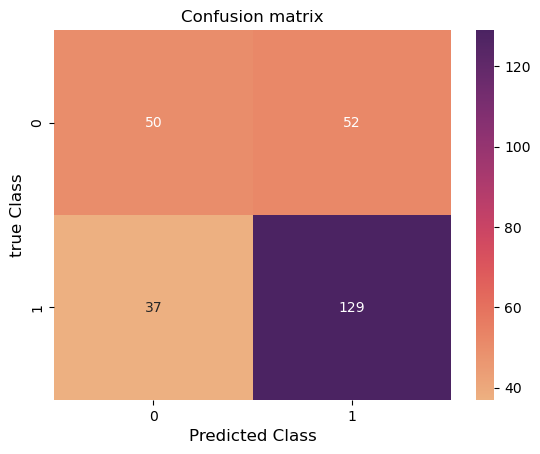

In [31]:
ax = sns.heatmap(cm, cmap='flare', annot=True, fmt='d')

plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('true Class', fontsize=12)
plt.title('Confusion matrix', fontsize=12)

plt.show()

# 0 represent '< 5 yrs',
# 1 represent '>= 5 yrs'

# Classification Metrics For K-NN

Confusion matrix contains four metrics:

We assume that positive is >= 5 yrs.

True Positive: individuals correctly classified as having >= 5 yrs (129)

True Negative: individuals correctly classified as having < 5 yrs (50)

False Positive: individuals incorrectly classified as having >= 5 yrs (52)

False Negative: individuals incorrectly classified as having < 5 yrs (37)

# Accuracy tells us how often our prediction is correct on the testing set.

Precision: when my model predcits >= 5 yrs (positive), how often is it correct? (67%)
 
Recall: when the career is >= 5 yrs, how often does our model predict >= 5 yrs.


# TUNING

#### Tune neighbors and p

In [32]:
neighbors_grid = range(1, 16)
p_grid=range(1,6)

params={'n_neighbors': neighbors_grid,
       'p': p_grid}

knn_gscv = GridSearchCV(classifier, param_grid=params, cv=5, n_jobs=-1, verbose=1)
knn_gscv.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 16), 'p': range(1, 6)},
             verbose=1)

In [33]:
knn_gscv.best_estimator_

KNeighborsClassifier(n_neighbors=15, p=4)

In [34]:
knn_gscv.score(X_test, y_test)

C:\Users\ogunr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7201492537313433

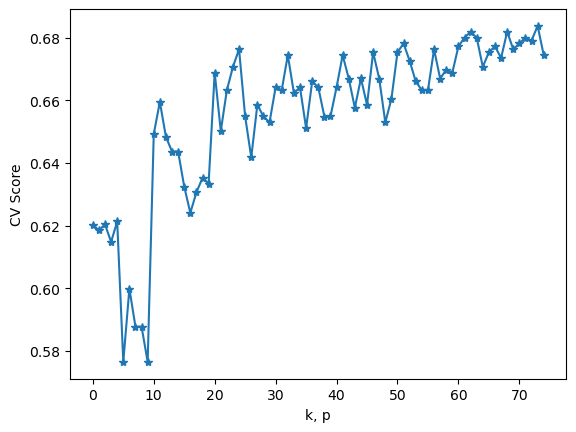

In [35]:
plt.plot(knn_gscv.cv_results_['mean_test_score'], '*-')
plt.xlabel('k, p')
plt.ylabel('CV Score')
plt.show()

# 2nd Model - NEURAL NETWORKS

In [41]:
conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.0

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [43]:
import tensorflow as tf

In [44]:
from tensorflow import keras

In [45]:
from tensorflow.keras import layers, optimizers 

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le=LabelEncoder()
y_train_nn=le.fit_transform(y_train)
y_test_nn=le.transform(y_test)

# BUILDING AND TRAINING THE NEURAL NETWORK

In [48]:
X_train.shape[1]

19

In [49]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(8,activation='relu',input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [50]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics='accuracy')

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 160       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


# FIT THE MODEL

In [52]:
history = model.fit(X_train, y_train_nn,                    
                    batch_size=8, epochs=10, 
                    verbose=1, 
                    validation_split=0.2)

Epoch 1/10
108/108 [==============================] - 1s 3ms/step - loss: 0.7669 - accuracy: 0.4737 - val_loss: 0.6824 - val_accuracy: 0.5907
Epoch 2/10
108/108 [==============================] - 0s 2ms/step - loss: 0.6269 - accuracy: 0.5974 - val_loss: 0.6405 - val_accuracy: 0.6558
Epoch 3/10
108/108 [==============================] - 0s 2ms/step - loss: 0.6015 - accuracy: 0.6558 - val_loss: 0.6291 - val_accuracy: 0.6605
Epoch 4/10
108/108 [==============================] - 0s 2ms/step - loss: 0.5908 - accuracy: 0.6569 - val_loss: 0.6198 - val_accuracy: 0.6977
Epoch 5/10
108/108 [==============================] - 0s 2ms/step - loss: 0.5850 - accuracy: 0.6698 - val_loss: 0.6144 - val_accuracy: 0.7163
Epoch 6/10
108/108 [==============================] - 0s 2ms/step - loss: 0.5797 - accuracy: 0.6768 - val_loss: 0.6076 - val_accuracy: 0.7302
Epoch 7/10
108/108 [==============================] - 0s 2ms/step - loss: 0.5756 - accuracy: 0.6943 - val_loss: 0.6024 - val_accuracy: 0.7209
Epoch 

# EVALUATE THE MODEL 

In [53]:
model.evaluate(X_test, y_test_nn)

9/9 [==============================] - 0s 2ms/step - loss: 0.5598 - accuracy: 0.7276


[0.5598458051681519, 0.7276119589805603]

In [54]:
nn_pred=np.round(model.predict(X_test))

9/9 [==============================] - 0s 1ms/step


In [55]:
nn_pred=nn_pred.ravel()

In [56]:
q=nn_pred.ravel().astype(int)

In [57]:
nn_pred_final=le.inverse_transform(q)

In [58]:
print(classification_report(y_test,nn_pred_final))

              precision    recall  f1-score   support

     < 5 yrs       0.64      0.65      0.64       102
    >= 5 yrs       0.78      0.78      0.78       166

    accuracy                           0.73       268
   macro avg       0.71      0.71      0.71       268
weighted avg       0.73      0.73      0.73       268



# Plot the training and validation accuracy

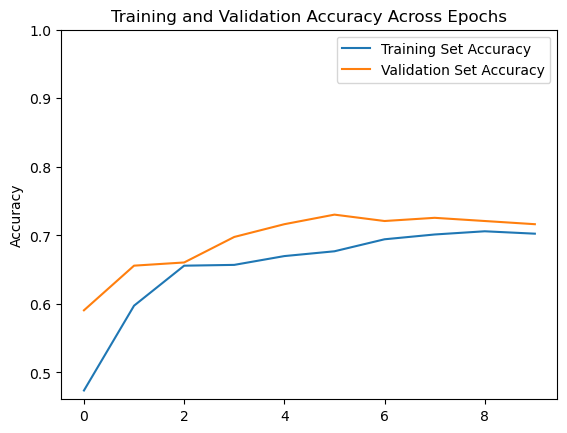

In [59]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

# Plot the training and validation loss 

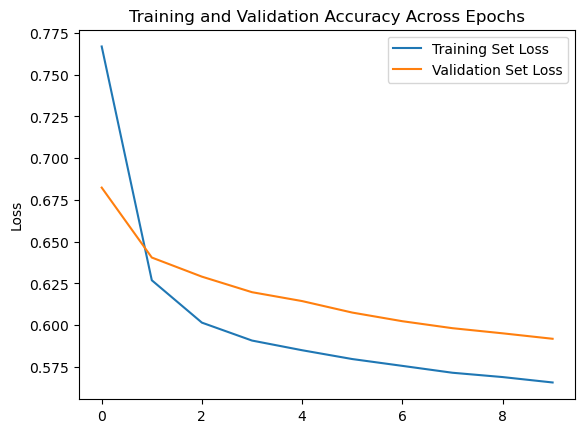

In [60]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

# GENERATE PREDICTION FOR THE TEST DATA

In [61]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

9/9 [==============================] - 0s 1ms/step


confusion_matrix function to generate a confusion matrix

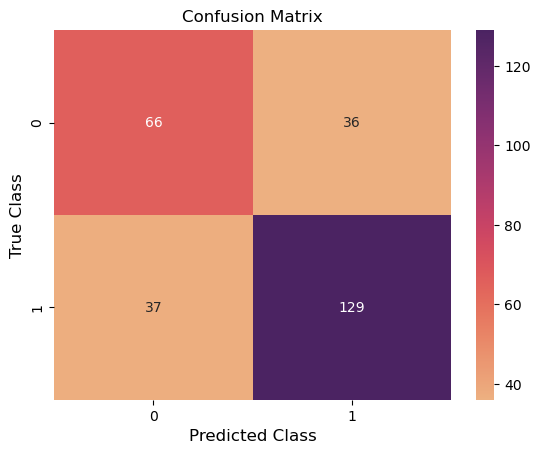

In [62]:
confusion_matrix = confusion_matrix(y_test,nn_pred_final)

ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)

plt.show()

# Classification Metrics For Neural Network

Confusion matrix contains four metrics:

We assume that positive is >= 5 yrs.

True Positive: individuals correctly classified as having >= 5 yrs (129)

True Negative: individuals correctly classified as having < 5 yrs (66)

False Positive: individuals incorrectly classified as having >= 5 yrs (36)

False Negative: individuals incorrectly classified as having < 5 yrs (37)

# Accuracy tells us how often our prediction is correct on the testing set.

Precision: when my model predcits >= 5 yrs (positive), how often is it correct? (73%)
 
Recall: when the career is >= 5 yrs, how often does our model predict >= 5 yrs.